<a href="https://colab.research.google.com/github/am987/lab7/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drzewa decyzyjne - laboratorium 1

22.03.2021r

Martyna Tarczewska, Anna Marciniak

In [ ]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

#Zad. 1

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.shape

(7787, 12)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

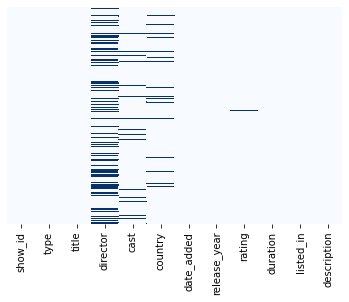

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
df.isnull().sum()

#Zad. 2

In [ ]:
df_titanic = sns.load_dataset('titanic')

In [ ]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

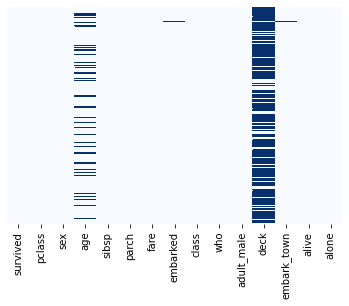

In [ ]:
sns.heatmap(df_titanic.isnull(), yticklabels = False, cbar = False, cmap="Blues")
df_titanic.isnull().sum()

In [ ]:
thresh = df_titanic.shape[0] * .3
df_titanic.dropna(thresh = thresh, axis = 1, inplace = True)

In [ ]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df_titanic['sex'] = df_titanic['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [ ]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#Zad. 3

In [ ]:
def plot_pie(x):
  labels = list(x.keys())
  sizes = list(x.values())

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')

  plt.show()

In [ ]:
r = requests.get('https://api.github.com/users/MikiKru/repos')
#r.json()

AD_W3_ADD


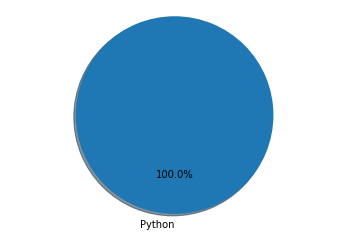

ad_w3_pg


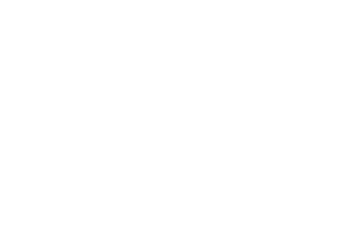

AEC_LAB1


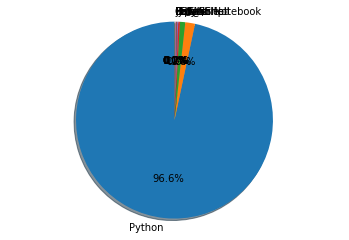

algorithms_java


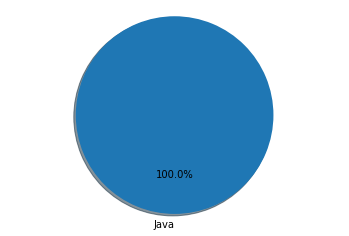

as_shop


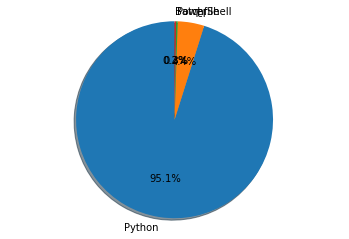

clouds_nst


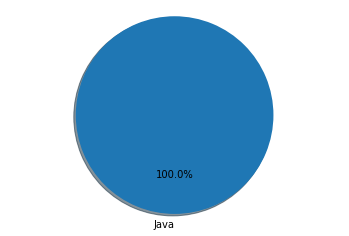

CookBook


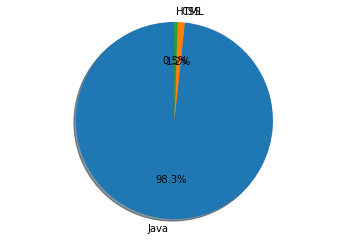

CourseGUI


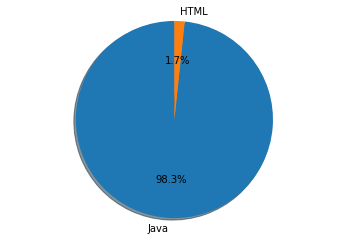

CppOpole


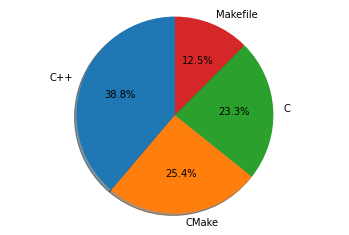

CppOpoleMod2


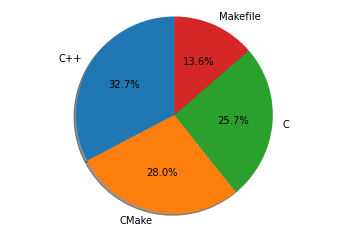

CppOpoleMod3


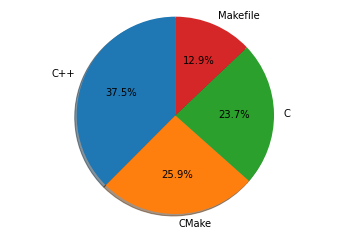

CppOpoleMod3_1


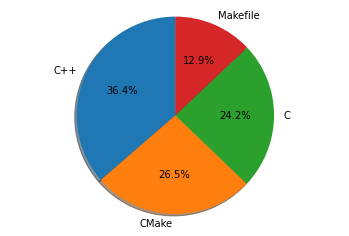

CppOpoleMySQL


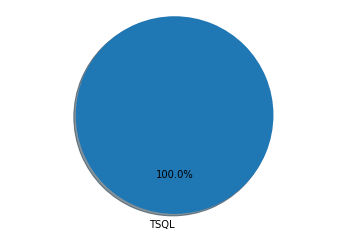

CStoGitHub


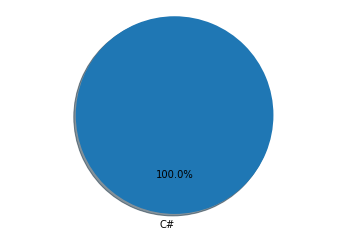

database_java


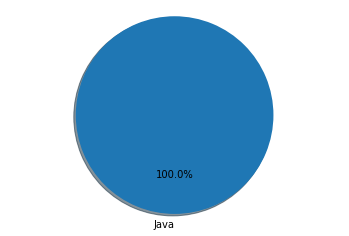

datasets


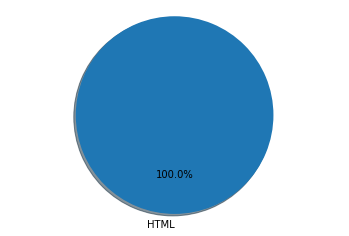

DB-MySQL


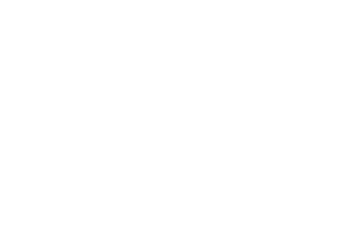

ds_decision_trees


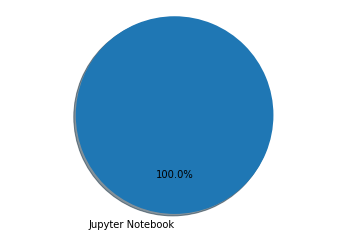

ERASMUS_IT_WSD


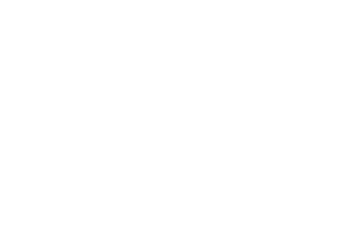

github_intro


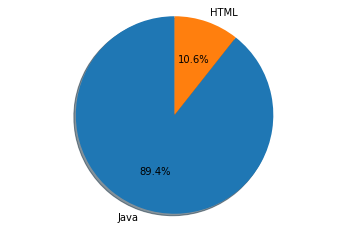

GitProject


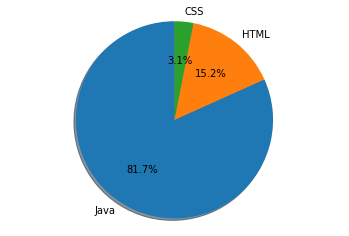

gitstart


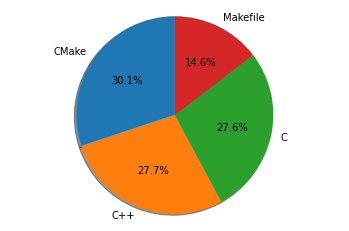

git_init


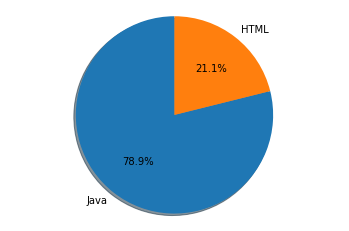

git_start


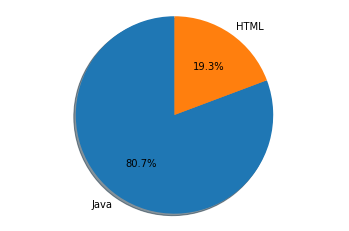

GS7


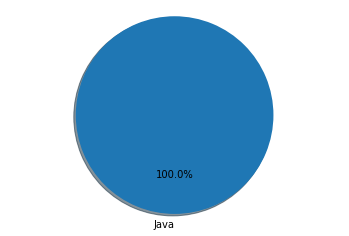

GUI-W1


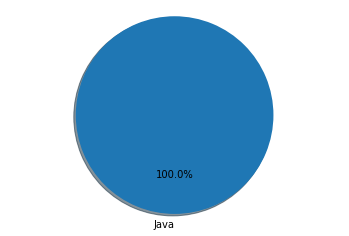

GUIProject_Template


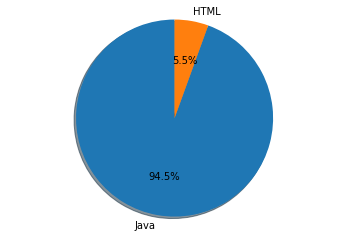

hibernate


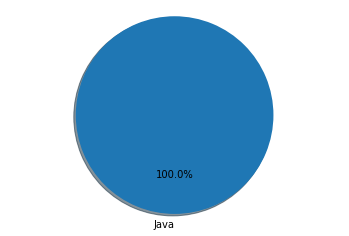

Java-Algorithms


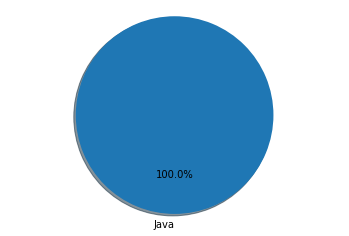

java-collections


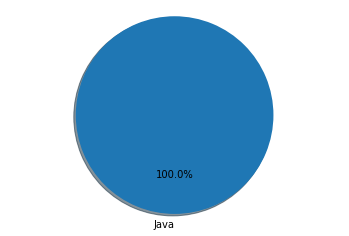

In [ ]:
for e in r.json():
  print(e['name'])
  repo_lang = requests.get(e['languages_url'])
  repo_lang = repo_lang.json()
  plot_pie(repo_lang)

#Zad. 4

In [ ]:
USER_AGENT = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
LANGUAGE = "en-US,en;q=0.5"

In [ ]:
def get_weather_data(url):
    session = requests.Session()
    session.headers['User-Agent'] = USER_AGENT
    session.headers['Accept-Language'] = LANGUAGE
    session.headers['Content-Language'] = LANGUAGE
    html = session.get(url)
    s = BeautifulSoup(html.text, "html.parser")
    return s

In [ ]:
soup = get_weather_data('https://weather.com/pl-PL/pogoda/10dni/l/e378104195bfa014e2b0c38805f60e755ec19a1d03be8cd16098478fc2ca26c3')

In [ ]:
print(soup.find("div", attrs={'class': 'DailyForecast--timestamp--iI022'}).text)
print(soup.find("span", attrs={'class': 'DailyContent--daypartDate--3MM0J'}).text)

Stan na godzinę: 11:45 CET
pon. 22


In [ ]:
print('Temperatura ', soup.find_all("span", attrs={'data-testid': 'TemperatureValue', 'class': 'DailyContent--temp--_8DL5'})[0].text)

Temperatura  6°


In [ ]:
max = (soup.find_all("span", attrs={'data-testid': 'TemperatureValue', 'class': 'DetailsSummary--highTempValue--3x6cL'})[0].text)
min = (soup.find_all("span", attrs={'data-testid': 'TemperatureValue', 'class': 'DetailsSummary--lowTempValue--1DlJK'})[0].text)


In [ ]:
print("Jutro: ", max, "\\", min)

Jutro:  6° \ -1°
